PRE-PROCESSED DATA SET USED

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("E:/SLIIT/3RD YEAR 2ND SEM/Fundamentals of Data Mining/GIT-FDM/Nethmi/Preprocessed_data.csv")

REDUCING TYPES TO 4

In [3]:
df['type'].value_counts()

0     91559
6     10930
11     6415
4      2262
10     2127
2      1833
9       345
3       281
5       228
7        55
8         3
1         1
Name: type, dtype: int64

In [3]:
df.drop(df.index[df['type'] == 10], inplace = True)

In [4]:
df.drop(df.index[df['type'] == 2], inplace = True)

In [5]:
df.drop(df.index[df['type'] == 9], inplace = True)

In [6]:
df.drop(df.index[df['type'] == 3], inplace = True)

In [7]:
df.drop(df.index[df['type'] == 5], inplace = True)

In [8]:
df.drop(df.index[df['type'] == 8], inplace = True)

In [9]:
df.drop(df.index[df['type'] == 7], inplace = True)

In [10]:
df.drop(df.index[df['type'] == 1], inplace = True)

In [11]:
df['type'].value_counts()

0     91559
6     10930
11     6415
4      2262
Name: type, dtype: int64

CEIL VALUE FOR BATHS

In [12]:
df.baths.unique()

array([1. , 3.5, 2. , 2.5, 1.5, 0. , 3. , 4.5, 4. , 7. , 6.5, 6. , 5. ,
       5.5, 7.5, 8. ])

In [13]:
# using np.ceil to round to
df['baths'] = df['baths'].apply(np.ceil)

In [14]:
df.head(3)

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1345,0,834,1,1.0,1,0,0,0,1,4,10,1
1,1600,6,3537,4,4.0,0,0,0,0,3,0,10,0
2,1205,0,1299,2,2.0,1,0,0,0,3,4,10,1


In [15]:
df.shape

(111166, 13)

In [15]:
#df.to_csv('Types_red.csv',index=False) 

PARTITIONING THE PRE PROCESSED DATA SET

In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state', 'pets_allowed']]  # Features
y=df['type']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(77816, 12)
(77816,)
(33350, 12)
(33350,)


STANDARDIZATION

In [17]:
from sklearn.preprocessing import StandardScaler
#the scaler model
scaler = StandardScaler()
#fitting and standardization
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

RANDOM FOREST MODEL BUILDING

In [18]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()


#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# predictions
y_pred = rfc.predict(X_test)


In [19]:
from sklearn.model_selection import StratifiedKFold

In [20]:
skf = StratifiedKFold(n_splits=5)

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298950524737631


In [22]:
#df.loc[df['type'] == 0 ]

#df.loc[df['type'] == 6 ]

df.loc[df['type'] == 11 ]

#df.loc[df['type'] == 4 ]

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
819,1050,11,1200,2,3.0,1,0,0,0,4,4,10,0
837,800,11,1000,2,2.0,0,0,0,0,4,4,10,1
955,432,11,414,4,5.0,1,1,0,0,4,4,10,1
1139,1650,11,2200,3,3.0,0,0,0,0,4,0,10,0
1293,800,11,1000,2,2.0,0,0,0,0,3,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116008,1610,11,1399,3,3.0,0,0,0,0,3,0,37,1
116011,1610,11,1399,3,3.0,0,0,0,0,3,0,37,1
116015,1610,11,1399,3,3.0,0,0,0,0,3,0,37,1
116026,1610,11,1399,3,3.0,0,0,0,0,3,0,37,1


In [25]:
#0
#rfc.predict([[1395, 1061, 2, 2, 0, 0, 0, 0, 4, 1, 37, 1 ]])

#6
#rfc.predict([[850, 1204, 3, 2, 0, 0, 0, 0, 3, 1, 10, 0 ]])

#11
rfc.predict([[1650, 2200, 3, 3, 0, 0, 0, 0, 4, 0, 10, 0 ]])

#4
#rfc.predict([[1350, 1100, 3, 3, 0, 0, 0, 0, 3, 0, 37, 0 ]])

array([11], dtype=int64)

MULTI LABELLED CONFUSION MATRIX BUILDING

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
#confusion matrix creation

LABELS = ['0', '4', '6', '11']

conf_matrix = confusion_matrix(y_test, y_pred)

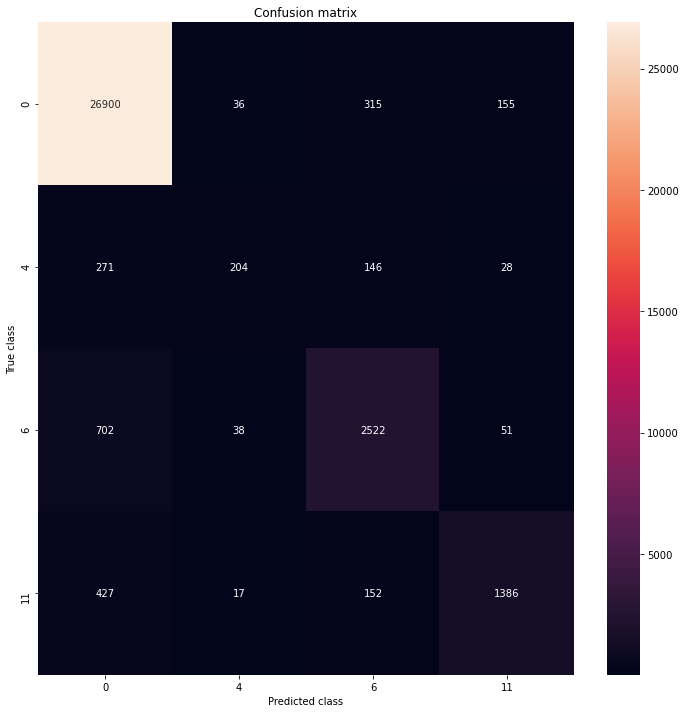

In [28]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()